# Weather Data - Exploratory Data Analysis
## Data Science - CS 334
--------------------------------------------

- In this part of the assignment we will perform some investigations to discover the hidden patterns/trends, verify assumptions with the help of statistics and graphical representations in the data.
- Use the cleaned `weather_data` file to do this part.

### Importing Libraries
---------------------------

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics as sts
sns.set()

In [217]:
df = pd.read_pickle('weather_clean.pkl')
print(df.shape)
df.head()

(366, 23)


CloudCover     Events  Max.Dew.PointF  Max.Gust.SpeedMPH  Max.Humidity  \
0         6.0       Rain            46.0               29.0          74.0   
1         7.0  Rain-Snow            40.0               29.0          92.0   
2         8.0       Rain            49.0               38.0         100.0   
3         3.0       None            24.0               33.0          69.0   
4         5.0       Rain            37.0               26.0          85.0   

   Max.Sea.Level.PressureIn  Max.TemperatureF  Max.VisibilityMiles  \
0                     30.45              64.0                 10.0   
1                     30.71              42.0                 10.0   
2                     30.40              51.0                 10.0   
3                     30.56              43.0                 10.0   
4                     30.68              42.0                 10.0   

   Max.Wind.SpeedMPH  Mean.Humidity  ...  Mean.Wind.SpeedMPH  MeanDew.PointF  \
0               22.0           63.0  ...                13.0            40.0   
1               24.0           72.0  ...                15.0            27.0   
2               29.0           79.0  ...                12.0            42.0   
3               25.0           54.0  ...                12.0            21.0   
4               22.0           66.0  ...                10.0            25.0   

   Min.DewpointF  Min.Humidity  Min.Sea.Level.PressureIn  Min.TemperatureF  \
0           26.0          52.0                     30.01              39.0   
1           17.0          51.0                     30.40              33.0   
2           24.0          57.0                     29.87              37.0   
3           13.0          39.0                     30.09              30.0   
4           12.0          47.0                     30.45              26.0   

   Min.VisibilityMiles  PrecipitationIn  WindDirDegrees       Date  
0                 10.0             0.01           268.0 2014-12-01  
1                  2.0             0.10            62.0 2014-12-02  
2                  1.0             0.44           254.0 2014-12-03  
3                 10.0             0.00           292.0 2014-12-04  
4                  5.0             0.11            61.0 2014-12-05  

[5 rows x 23 columns]

You can see the statistics for all the columns using the `describe` function in pandas.

In [218]:
df.describe(include='all')

CloudCover Events  Max.Dew.PointF  Max.Gust.SpeedMPH  Max.Humidity  \
count   366.000000    366      366.000000         366.000000    366.000000   
unique         NaN     12             NaN                NaN           NaN   
top            NaN   None             NaN                NaN           NaN   
freq           NaN    201             NaN                NaN           NaN   
first          NaN    NaN             NaN                NaN           NaN   
last           NaN    NaN             NaN                NaN           NaN   
mean      4.707650    NaN       45.475410          26.964481     83.226776   
std       2.373206    NaN       18.317241           8.566747     14.277886   
min       0.000000    NaN       -6.000000           0.000000     39.000000   
25%       3.000000    NaN       32.000000          21.000000     73.250000   
50%       5.000000    NaN       47.500000          25.500000     86.000000   
75%       7.000000    NaN       61.000000          31.000000     93.000000   
max       8.000000    NaN       75.000000          94.000000    100.000000   

        Max.Sea.Level.PressureIn  Max.TemperatureF  Max.VisibilityMiles  \
count                 366.000000        366.000000           366.000000   
unique                       NaN               NaN                  NaN   
top                          NaN               NaN                  NaN   
freq                         NaN               NaN                  NaN   
first                        NaN               NaN                  NaN   
last                         NaN               NaN                  NaN   
mean                   30.155328         58.931694             9.907104   
std                     0.232095         20.047156             0.707768   
min                    29.580000         18.000000             2.000000   
25%                    30.000000         42.000000            10.000000   
50%                    30.140000         60.000000            10.000000   
75%                    30.310000         76.000000            10.000000   
max                    30.880000         96.000000            10.000000   

        Max.Wind.SpeedMPH  Mean.Humidity  ...  Mean.Wind.SpeedMPH  \
count          366.000000     366.000000  ...          366.000000   
unique                NaN            NaN  ...                 NaN   
top                   NaN            NaN  ...                 NaN   
freq                  NaN            NaN  ...                 NaN   
first                 NaN            NaN  ...                 NaN   
last                  NaN            NaN  ...                 NaN   
mean            20.620219      66.021858  ...           10.680328   
std              5.762945      14.433392  ...            3.491515   
min              8.000000      28.000000  ...            4.000000   
25%             16.000000      56.000000  ...            8.000000   
50%             20.000000      66.000000  ...           10.000000   
75%             24.000000      76.750000  ...           13.000000   
max             38.000000      98.000000  ...           22.000000   

        MeanDew.PointF  Min.DewpointF  Min.Humidity  Min.Sea.Level.PressureIn  \
count       366.000000     366.000000    366.000000                366.000000   
unique             NaN            NaN           NaN                       NaN   
top                NaN            NaN           NaN                       NaN   
freq               NaN            NaN           NaN                       NaN   
first              NaN            NaN           NaN                       NaN   
last               NaN            NaN           NaN                       NaN   
mean         38.959016      32.245902     48.308743                 29.925956   
std          19.870153      21.811639     17.414221                  0.241768   
min         -11.000000     -18.000000     16.000000                 29.160000   
25%          24.000000      16.250000     35.000000                 29.760000   
50%   

## Distributions + Correlation
------------------------------------

#### Use plots to support your findings.
- The world of Data Science revolves around the probability distributions and the core of probability distribution is focused on Normal distributions.This is from where we draw our assumptions about a feature/variable and make hypothesis. So which variables are normally distributed in this data? Do you see any variables which shows bi-modal distribution? Tri-modal?
- In reality, data is not always spread consistently. One of the reasons might be that there is not sufficient information available from one group of data. Another reason might be that if data is collected through forms/devices then some people might choose to not enter the data or the device might be faulty. Hence, we need to know whether there is any feature in the data which is skewed. Are there any variables which are skewed? If yes then plot those.
- Is Gust Speed effected by any other variable in the data? If yes, then which column/columns? 
- Show the relatioship between all the variables. Explain these relations. (Linear, positive, negative, not-related,etc)
- How can we detect multicollinearity? Which plot can be used? Which variables fall under this? [Click here to read up on `multi-collinearity`](https://towardsdatascience.com/multicollinearity-in-data-science-c5f6c0fe6edf) since we haven't covered this in class. Google is your friend so use it!

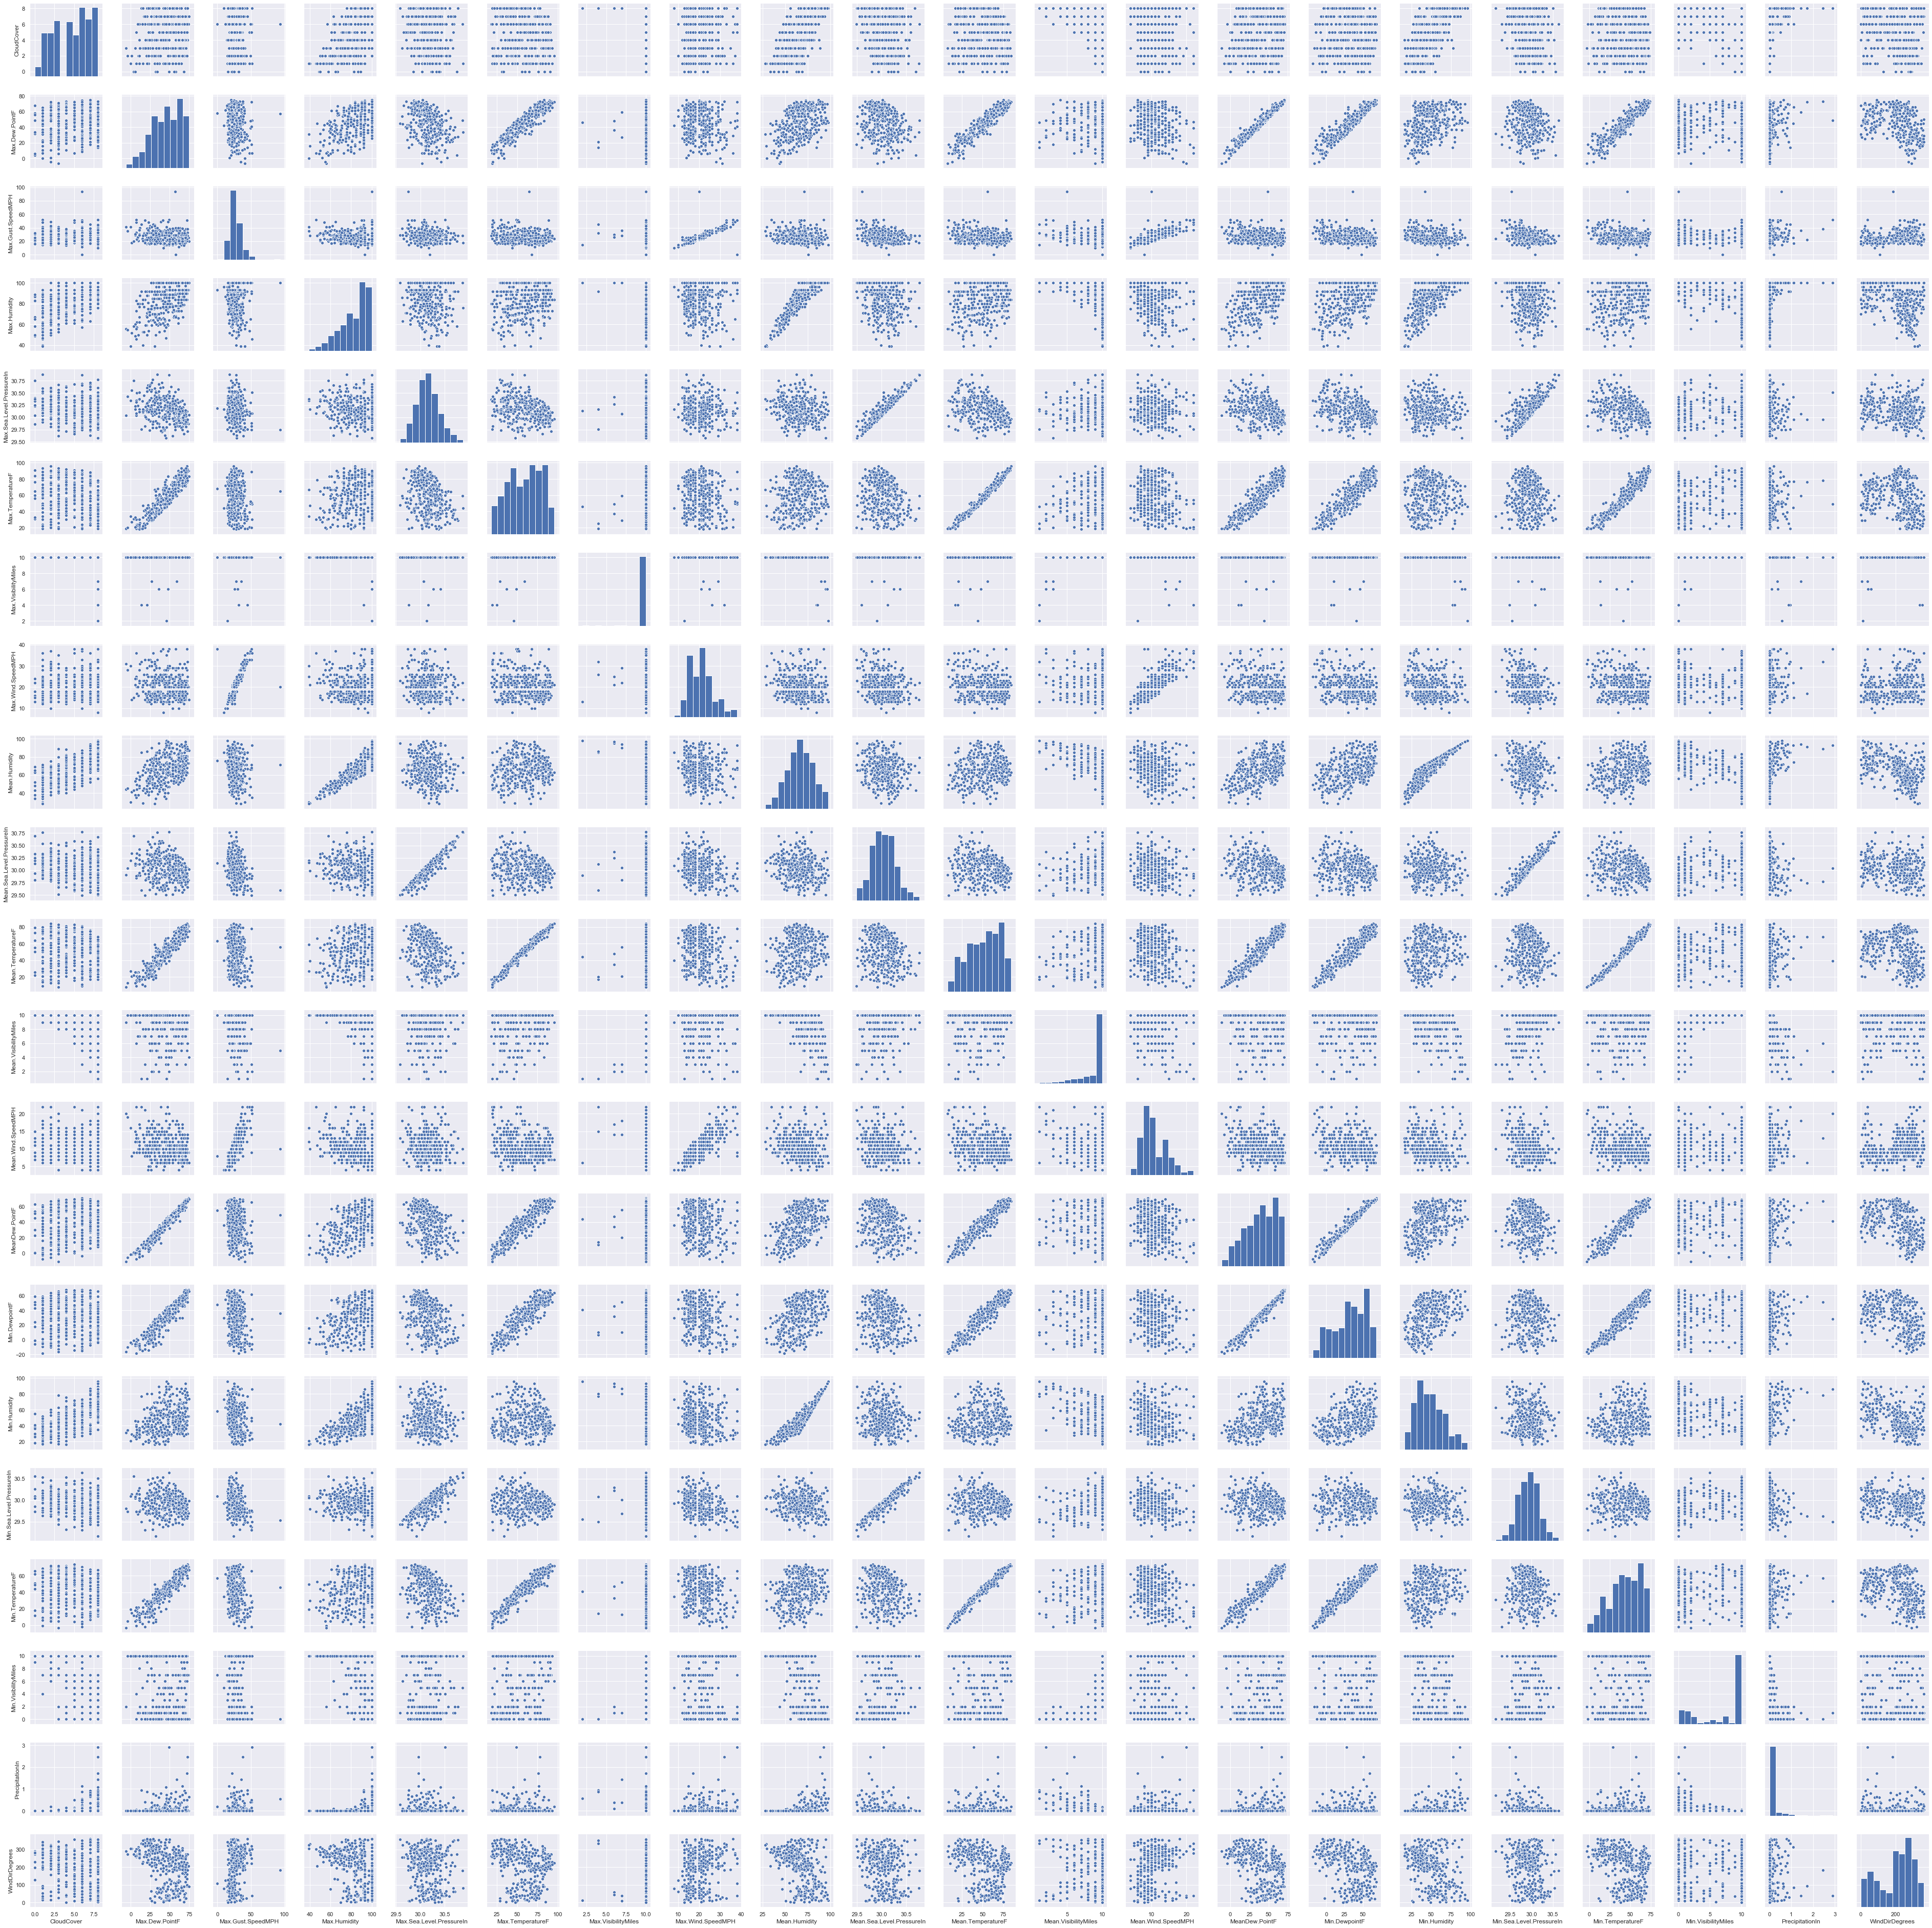

In [219]:
sns.pairplot(df)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


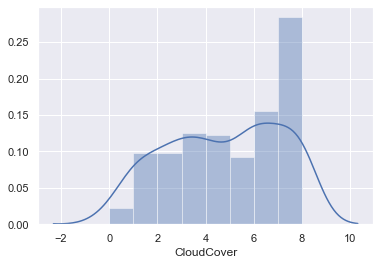

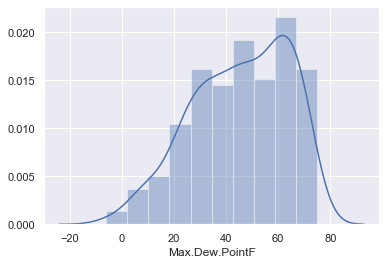

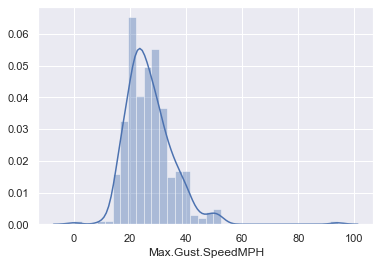

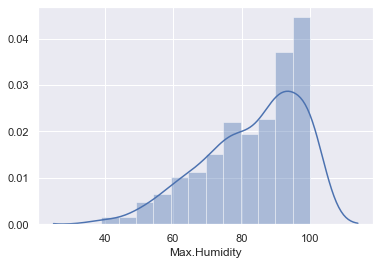

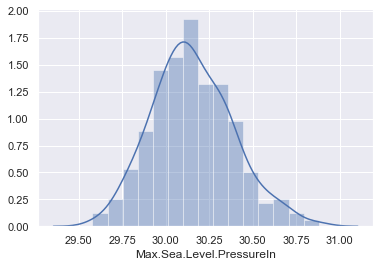

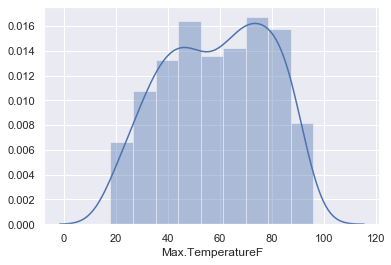

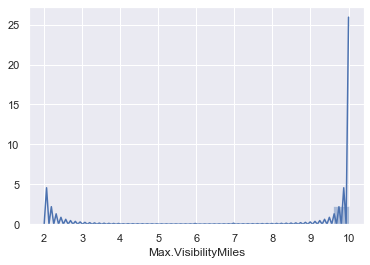

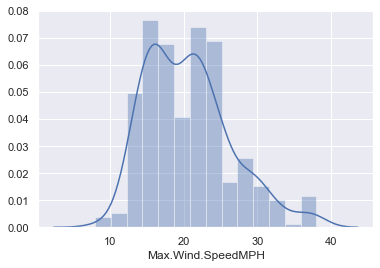

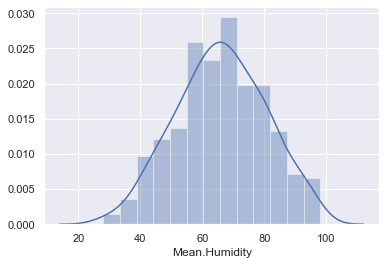

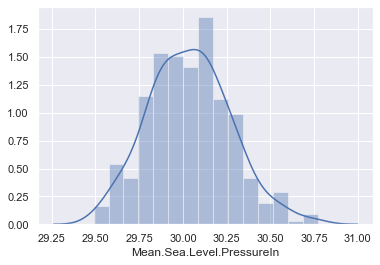

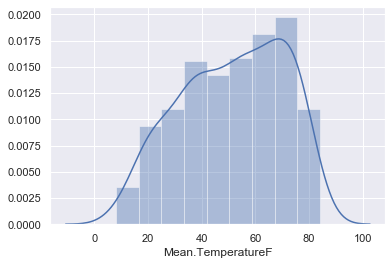

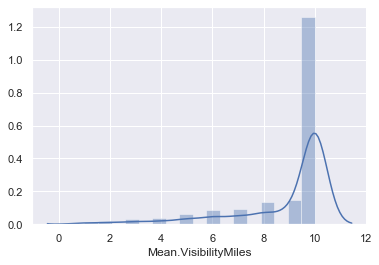

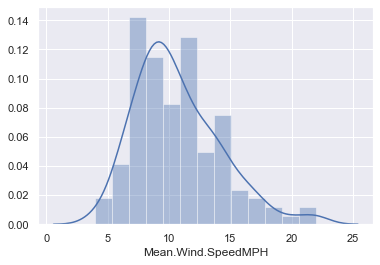

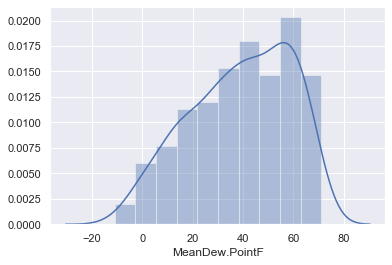

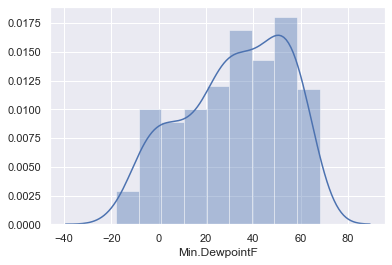

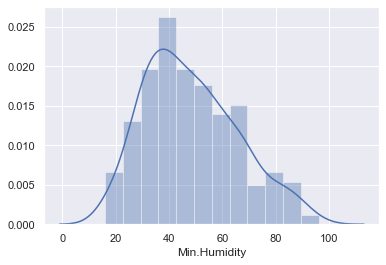

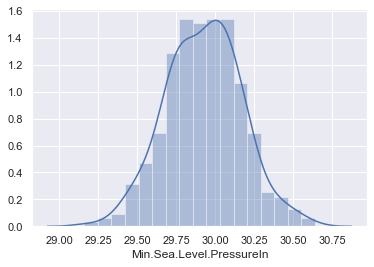

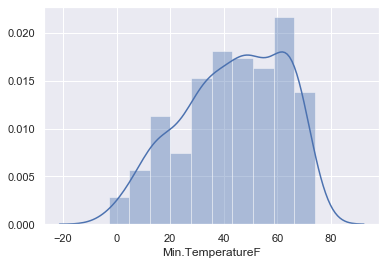

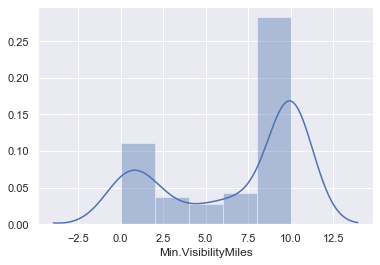

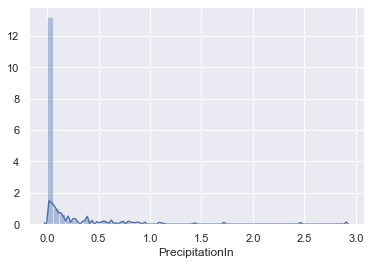

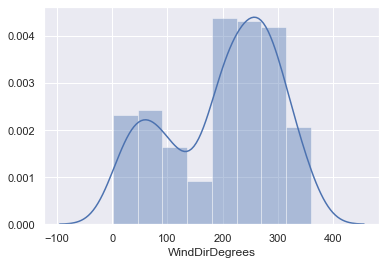

In [220]:
plt.figure(1)
sns.distplot(df['CloudCover'])
ds= df.loc[[], 'Max.Dew.PointF':'WindDirDegrees']
i=2
for col in ds:
    plt.figure(i)
    sns.distplot(df[col])
    i=i+1
    

## Bi Modal:
- 1) WindDir Degrees
- 2) MinVisibilityMiles
- 3) Max Win.SpeedMPH


## Normally Distributed:
- 1) Min.Sea Level Pressure in

- 2) Max-sea level-Pressure in
- 3) Mean.Humidity
- 4) Mean- Sea level PressureIn
- 5) Mean.Wind.SpeedMPH

In [221]:
cor= df.corr()
cor

CloudCover  Max.Dew.PointF  Max.Gust.SpeedMPH  \
CloudCover                   1.000000        0.107197           0.031493   
Max.Dew.PointF               0.107197        1.000000          -0.170611   
Max.Gust.SpeedMPH            0.031493       -0.170611           1.000000   
Max.Humidity                 0.600775        0.500399          -0.053904   
Max.Sea.Level.PressureIn    -0.085851       -0.357358          -0.137283   
Max.TemperatureF            -0.176520        0.916816          -0.155905   
Max.VisibilityMiles         -0.182585        0.079071          -0.036694   
Max.Wind.SpeedMPH            0.071187       -0.166907           0.819651   
Mean.Humidity                0.681651        0.433469          -0.156072   
Mean.Sea.Level.PressureIn   -0.149839       -0.252000          -0.293154   
Mean.TemperatureF           -0.137745        0.931929          -0.202039   
Mean.VisibilityMiles        -0.562877        0.057928          -0.223010   
Mean.Wind.SpeedMPH           0.007537       -0.274139           0.734312   
MeanDew.PointF               0.098979        0.979160          -0.227213   
Min.DewpointF                0.042517        0.935630          -0.295010   
Min.Humidity                 0.635354        0.309473          -0.212233   
Min.Sea.Level.PressureIn    -0.182084       -0.136888          -0.372979   
Min.TemperatureF            -0.093166        0.924337          -0.246734   
Min.VisibilityMiles         -0.656385       -0.008143          -0.196936   
PrecipitationIn              0.379576        0.112787           0.226715   
WindDirDegrees              -0.254417       -0.371649           0.230571   

                           Max.Humidity  Max.Sea.Level.PressureIn  \
CloudCover                     0.600775                 -0.085851   
Max.Dew.PointF                 0.500399                 -0.357358   
Max.Gust.SpeedMPH             -0.053904                 -0.137283   
Max.Humidity                   1.000000                 -0.181962   
Max.Sea.Level.PressureIn      -0.181962                  1.000000   
Max.TemperatureF               0.192063                 -0.344921   
Max.VisibilityMiles           -0.128587                  0.025203   
Max.Wind.SpeedMPH             -0.032314                 -0.077159   
Mean.Humidity                  0.889384                 -0.149603   
Mean.Sea.Level.PressureIn     -0.204235                  0.932232   
Mean.TemperatureF              0.220120                 -0.358699   
Mean.VisibilityMiles          -0.507536                  0.069448   
Mean.Wind.SpeedMPH            -0.171824                 -0.037279   
MeanDew.PointF                 0.483993                 -0.369091   
Min.DewpointF                  0.414918                 -0.355055   
Min.Humidity                   0.653173                 -0.098419   
Min.Sea.Level.PressureIn      -0.200225                  0.784950   
Min.TemperatureF               0.244227                 -0.365599   
Min.VisibilityMiles           -0.623441                  0.105200   
PrecipitationIn                0.353635                 -0.046294   
WindDirDegrees                -0.375098                 -0.128368   

                           Max.TemperatureF  Max.VisibilityMiles  \
CloudCover                        -0.176520            -0.182585   
Max.Dew.PointF                     0.916816             0.079071   
Max.Gust.SpeedMPH                 -0.155905            -0.036694   
Max.Humidity                       0.192063            -0.128587   
Max.Sea.Level.PressureIn          -0.344921             0.025203   
Max.TemperatureF                   1.000000             0.147460   
Max.VisibilityMiles                0.147460             1.000000   
Max.Wind.SpeedMPH                 -0.161174            -0.059050   
Mean.Humidity                      0.099123            -0.237420   
Mean.Sea.Level.PressureIn         -0.212340             0.029750   
Mean.TemperatureF                  0.988493             0.123412   
Mean.VisibilityMile

## Relationships:
### Cloud Cover: 
- Max.Dew.PointF = not related ,   Max.Gust.SpeedMPH= Not related ,  Max.Humidity= Moderate Positive,  Max.Sea.Level.PressureIn= not related ,     Max.TemperatureF= Not related ,    Max.VisibilityMiles= not related ,  Max.Wind.SpeedMPH= not related,   Mean.Humidity= Positive Relationship , Mean.Sea.Level.PressureIn= Not related , Mean.TemperatureF= not related,  Mean.VisibilityMiles= Negative Relationship, 	Min.Humidity = Positive relationship, 
#### All others are not related 
### Max.Dew.PointF
- Max.Humidity = Positive relationship
- Max.TemperatureF= Positive Linear Relationship
- Mean.Humidity = Positive relationship
- Mean.TemperatureF = Positive linear relationship
- Min.TemperatureF = positive Linear relationship

### Max.Humidity
- Max.Wind.SpeedMPH positive
- Mean.VisibilityMiles - Negative Relatonship
- MeanDew.PointF - positive

### Max.Sea.Level.PressureIn
- Max.Dew.PointF - Weak Negative
- Mean.TemperatureF- Weak Negative
- MeanDew.PointF - Weak Negative

### Max.TemperatureF
- Max.Dew.PointF = Positive relationship linear

### Max.Wind.SpeedMPH
- Max.Gust.SpeedMPH	- positive relationship

### PrecipitationIn
- Cloud Cover - Positive Relationship
- Max Humidity- Positive Relationship
- Mean.Humidity- Positive relationship
- Mean.VisibilityMiles - Negative Relationships

### WindDirDegrees
- Max.Dew.PointF - Negative
- Max humidity - Negative



#### All others are mostly not related. The trend is similar for mean and min of the same variables . All of these are justified by the plots and correlation values provided above.


### Gust Speed:
- As seen from the correlation table , Gust Speed is effected by Max.Wind.SpeedMPH (positive) , Mean.Wind.SpeedMPH (positive), 

In [222]:
skew= df.skew()
skew
        

CloudCover                  -0.186499
Max.Dew.PointF              -0.436778
Max.Gust.SpeedMPH            1.805719
Max.Humidity                -0.719378
Max.Sea.Level.PressureIn     0.330029
Max.TemperatureF            -0.162292
Max.VisibilityMiles         -8.350676
Max.Wind.SpeedMPH            0.750892
Mean.Humidity               -0.070048
Mean.Sea.Level.PressureIn    0.243722
Mean.TemperatureF           -0.270501
Mean.VisibilityMiles        -1.977480
Mean.Wind.SpeedMPH           0.829347
MeanDew.PointF              -0.382789
Min.DewpointF               -0.368243
Min.Humidity                 0.496616
Min.Sea.Level.PressureIn    -0.007247
Min.TemperatureF            -0.377408
Min.VisibilityMiles         -0.650277
PrecipitationIn              5.288869
WindDirDegrees              -0.475575
dtype: float64

## Skewed Variables:
- Max.Gust.SpeedMPH
- Max.VisibilityMiles
- Mean.VisibilityMiles
- PrecipitationIn

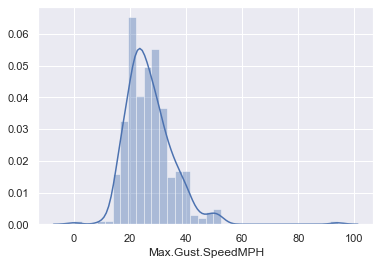

In [223]:
sns.distplot(df['Max.Gust.SpeedMPH'])

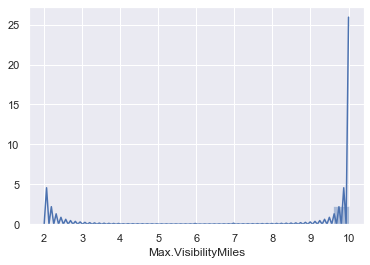

In [224]:
sns.distplot(df['Max.VisibilityMiles'])

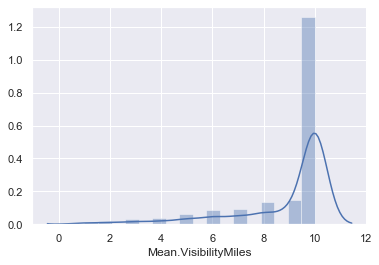

In [225]:
sns.distplot(df['Mean.VisibilityMiles'])

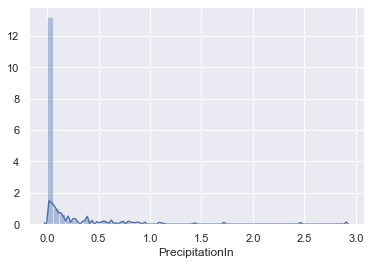

In [226]:
sns.distplot(df['PrecipitationIn'])

## Multi Collinearity

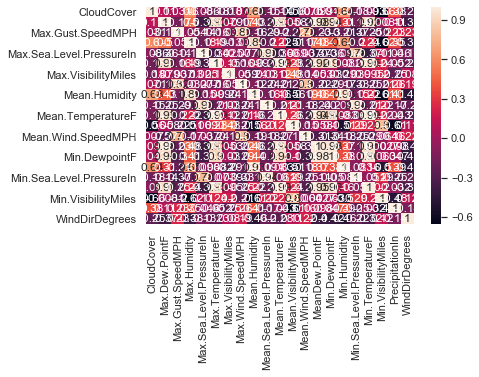

In [227]:
sns.heatmap(df.corr(), annot= True)
plt.show()

## General Observations
----------------------------
#### Use plots to support your findings.


## Time Plots
------------

In [228]:
df['Date'].min(), df['Date'].max()

(Timestamp('2014-12-01 00:00:00'), Timestamp('2015-12-01 00:00:00'))

So the time period of the data is a whole year from December 2014 to December 2015. 

### Temprature all around the year
#### Use plots to support your findings.

-  We want to figure out the hottest and coldest months of the year and also identify the seasons as well. Time plots will help us to answer these questions.
- How does the temprature vary between the months? Draw a plot and explain the trend. Also show the mean and median value of temprature on the plot as well. `Hint:` Using Horizontal lines
- Now we want to show how much the temprature varies on the same plot. Hint: See the matplotlib or documentation to calculate and plot the variation of the temprature on the same plot using the standard deviation.
- For each month find the `Mean.TemperatureF` and show the trend using a scatter plot. What can you observe?
- Is there any trend by how the `Mean.TemperatureF` changes with days of a week? Which day is the coldest and which is the hottest according to the data?
- From June to August, show the correlation between `Mean.VisibilityMiles` and `Mean.Humidity` if there is any using a single plot. `Hint:` Use a line plot. Is there anything interesting that you observe?
- Use `rolling mean` to show the change of `Mean.TemperatureF` weekly and monthly all year round. (Weakly rolling mean and Monthly rolling mean.)
- Use a suitable visualization to show counts of different `Events` per month. Which event occured the most and during which month?
- For each month, plot the minimum, maximum and average temprature. Do you see any trends? Draw a comparison between the values for all the months.
- Plot the temperature of hottest and coldest day of every month on same plot.

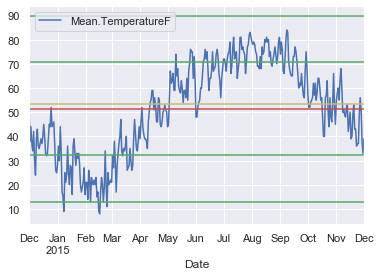

In [229]:
m0= df['Mean.TemperatureF']
m= sts.mean(m0)



standard= m0.std()
dev1= m+ standard
devmin= m- standard
dev2= m+ 2* standard
devmin2= m-2* standard





median= sts.median(m0)

ax= df.plot( y='Mean.TemperatureF', x='Date',  rot=0)
ax.axhline(y=m, color='r', label='mean')
ax.axhline(y=median, color='y' ,label = 'median')

ax.axhline(y=dev1, color='g', label='mean')
ax.axhline(y=dev2, color='g' )

ax.axhline(y=devmin, color='g', label='mean')
ax.axhline(y=devmin2, color='g' )


 




#### Mean Temperature trend between the months:
- Mean line drawn horiztontally with red color
- Median line drawn horiztontally with yellow color
- 2 standard deviation  line drawn horiztontally with green color, standard dev is calculated then mean+- one dev and mean+- 2 dev.
-  the variation of the temperature can be seen using the deviation as even according to normal distribution formulas almost 90-95% data lies in between 2 deviations. Deviations tell us about how much the data varies during change in months from mean value

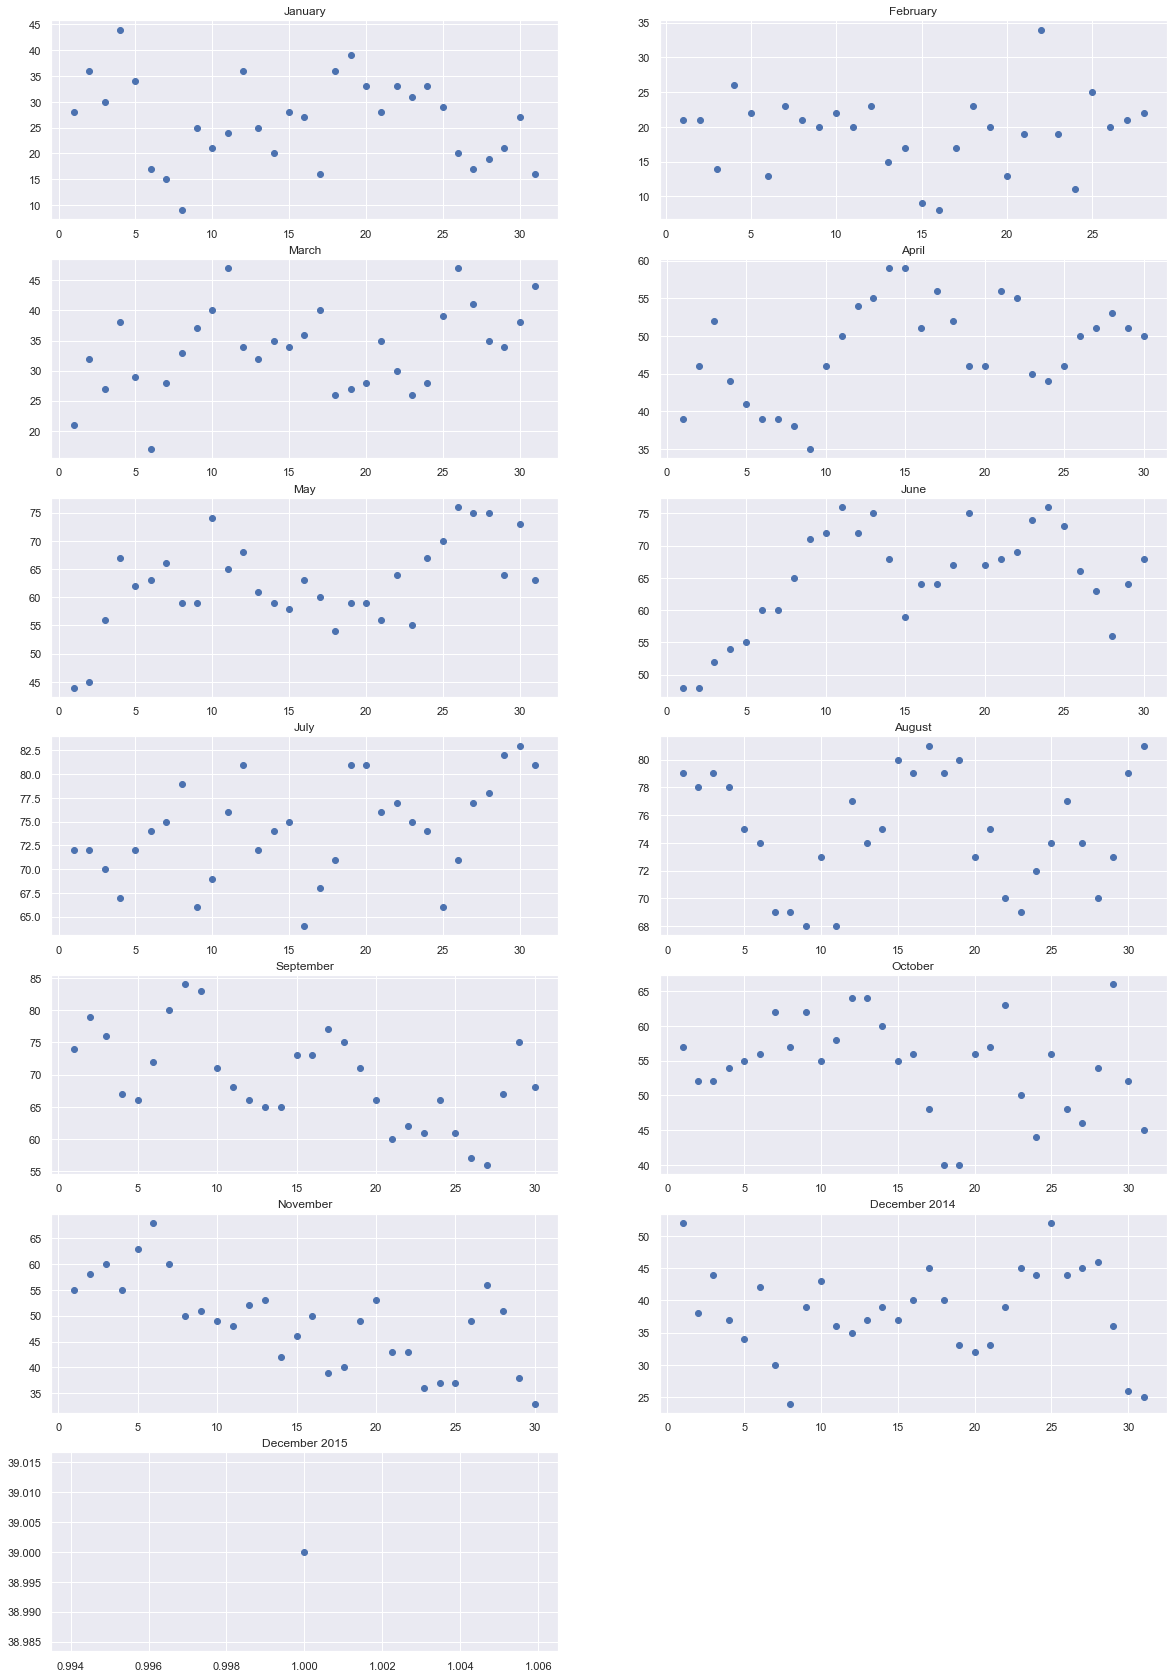

In [230]:
    
    fig = plt.figure()
    fig.set_figheight(30)
    fig.set_figwidth(20)
    
   
    
    
    mask = df['Date'].map(lambda x: x.month) == 1
    df[mask]
    days = df[mask]['Date'].dt.day
    mean_temp= df[mask]['Mean.TemperatureF']
    ax = fig.add_subplot(7,2,1)
    ax.scatter(days, mean_temp)
    ax.title.set_text('January')
    
    mask = df['Date'].map(lambda x: x.month) == 2
    df[mask]
    days = df[mask]['Date'].dt.day
    mean_temp= df[mask]['Mean.TemperatureF']
    ax = fig.add_subplot(7,2,2)
    ax.scatter(days, mean_temp)
    ax.title.set_text('February')
    
    mask = df['Date'].map(lambda x: x.month) == 3
    df[mask]
    days = df[mask]['Date'].dt.day
    mean_temp= df[mask]['Mean.TemperatureF']
    ax = fig.add_subplot(7,2,3)
    ax.scatter(days, mean_temp)
    ax.title.set_text('March')
    
    mask = df['Date'].map(lambda x: x.month) == 4
    df[mask]
    days = df[mask]['Date'].dt.day
    mean_temp= df[mask]['Mean.TemperatureF']
    ax = fig.add_subplot(7,2,4)
    ax.scatter(days, mean_temp)
    ax.title.set_text('April')
    
    mask = df['Date'].map(lambda x: x.month) == 5
    df[mask]
    days = df[mask]['Date'].dt.day
    mean_temp= df[mask]['Mean.TemperatureF']
    ax = fig.add_subplot(7,2,5)
    ax.scatter(days, mean_temp)
    ax.title.set_text('May')
    
    mask = df['Date'].map(lambda x: x.month) == 6
    df[mask]
    days = df[mask]['Date'].dt.day
    mean_temp= df[mask]['Mean.TemperatureF']
    ax = fig.add_subplot(7,2,6)
    ax.scatter(days, mean_temp)
    ax.title.set_text('June')
    
    mask = df['Date'].map(lambda x: x.month) == 7
    df[mask]
    days = df[mask]['Date'].dt.day
    mean_temp= df[mask]['Mean.TemperatureF']
    ax = fig.add_subplot(7,2,7)
    ax.scatter(days, mean_temp)
    ax.title.set_text('July')
    
    mask = df['Date'].map(lambda x: x.month) == 8
    df[mask]
    days = df[mask]['Date'].dt.day
    mean_temp= df[mask]['Mean.TemperatureF']
    ax = fig.add_subplot(7,2,8)
    ax.scatter(days, mean_temp)
    ax.title.set_text('August')
    
    mask = df['Date'].map(lambda x: x.month) == 9
    df[mask]
    days = df[mask]['Date'].dt.day
    mean_temp= df[mask]['Mean.TemperatureF']
    ax = fig.add_subplot(7,2,9)
    ax.scatter(days, mean_temp)
    ax.title.set_text('September')
    
    mask = df['Date'].map(lambda x: x.month) == 10
    df[mask]
    days = df[mask]['Date'].dt.day
    mean_temp= df[mask]['Mean.TemperatureF']
    ax = fig.add_subplot(7,2,10)
    ax.scatter(days, mean_temp)
    ax.title.set_text('October')
    
    mask = df['Date'].map(lambda x: x.month) == 11
    df[mask]
    days = df[mask]['Date'].dt.day
    mean_temp= df[mask]['Mean.TemperatureF']
    ax = fig.add_subplot(7,2,11)
    ax.scatter(days, mean_temp)
    ax.title.set_text('November')
    
    mask = df['Date'].map(lambda x: x.month==12 and x.year==2014 )
    df[mask]
    days = df[mask]['Date'].dt.day
    mean_temp= df[mask]['Mean.TemperatureF']
    ax = fig.add_subplot(7,2,12)
    ax.scatter(days, mean_temp)
    ax.title.set_text('December 2014')
   

    mask = df['Date'].map(lambda x: x.month==12 and x.year==2015 )
    df[mask]
    days = df[mask]['Date'].dt.day
    mean_temp= df[mask]['Mean.TemperatureF']
    ax = fig.add_subplot(7,2,13)
    ax.scatter(days, mean_temp)
    ax.title.set_text('December 2015')
   
    
    


  
    
   
  
    
    

    



    
    

#### Temperature of Each month:
- 12 months temperatures are plotted using scatter plots. There is a general trend in few months where in others there is not. When the seasons are changing there is a general increase of decrease in temperatures. Starting from January- March the trend is constant as their is not a clear change in weather, there are slight increase in weather from february to March and fro start of march to end march weather starts to increase. However, in April the weather increases and even reaches a peak at the middle of the month, the weather almost stays constant in May. In june the start few weeks the weather increases linearly and then becomes constant. Now this weather remains more or less the same in July, August and september but starts to decrease at september end. In October there is a slight decrease throughout the month and same for november. There is a general downward trend and again in December weather starts becoming constant again.

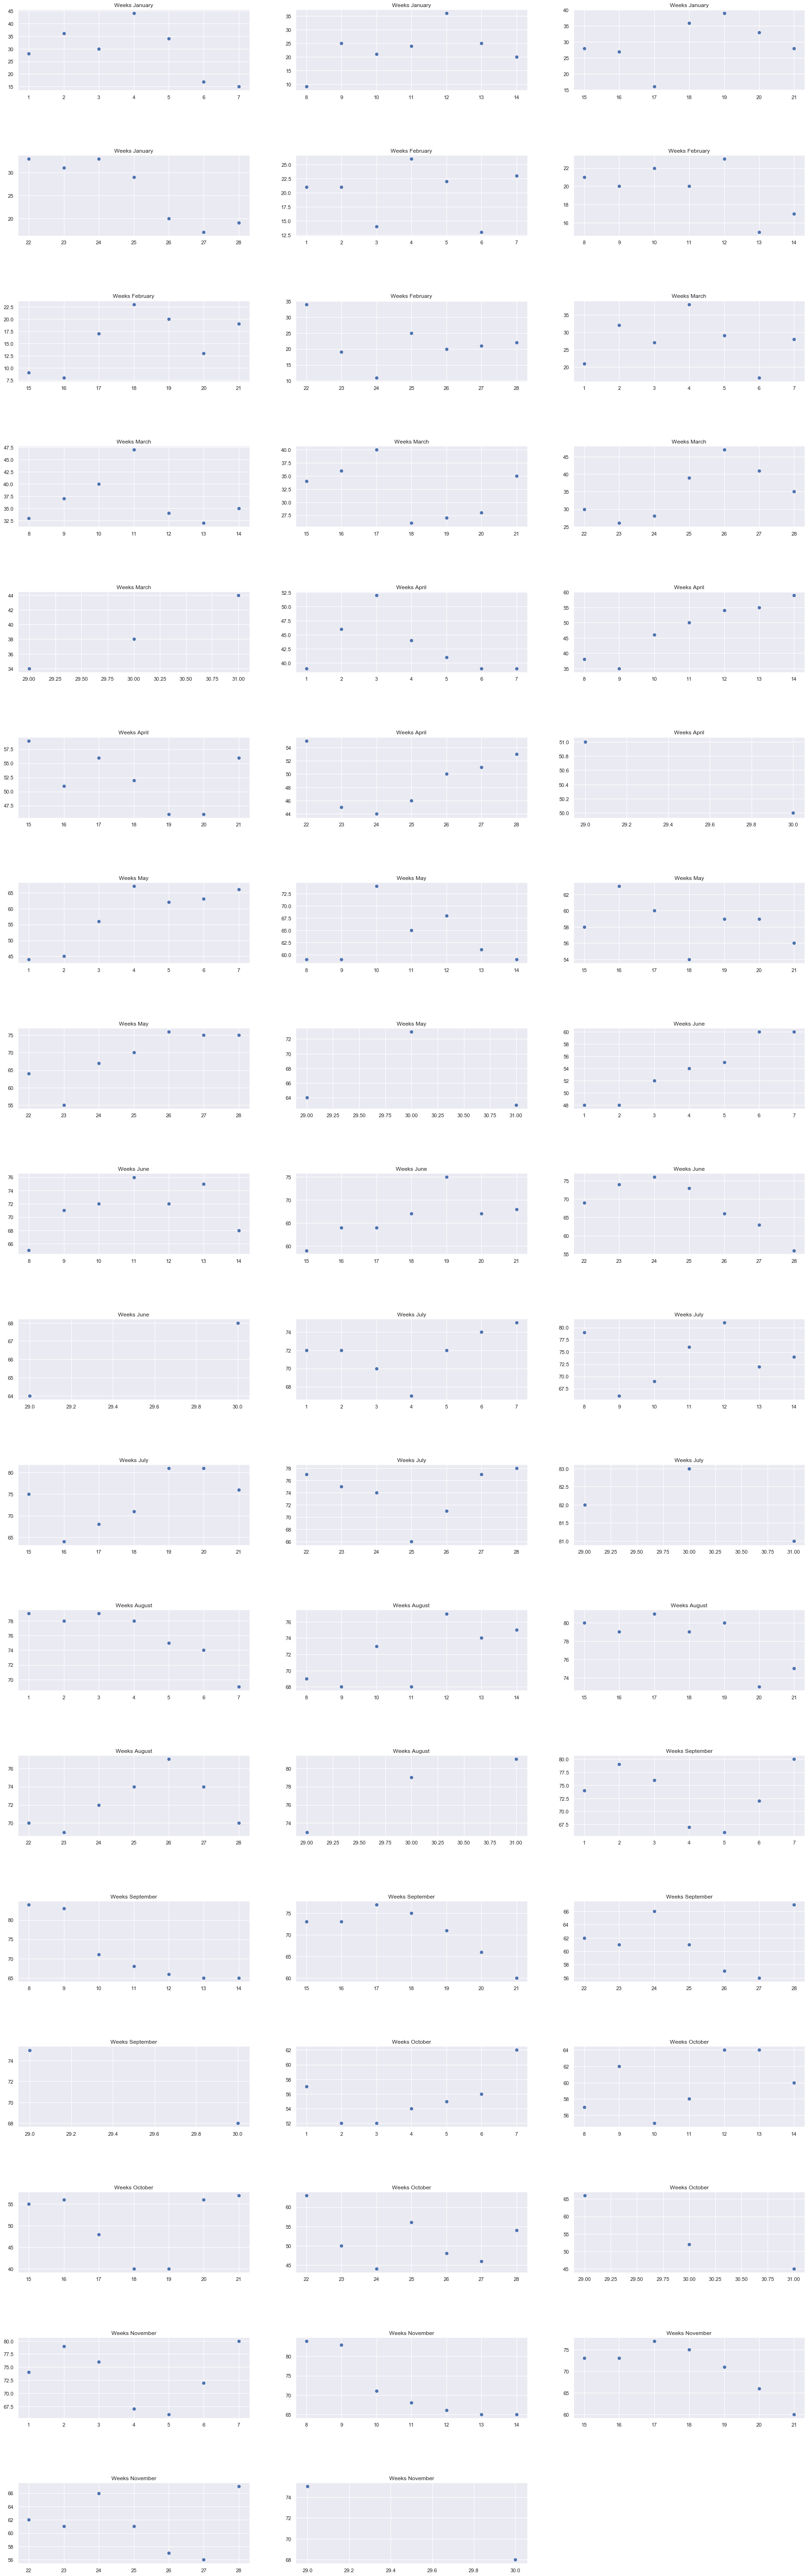

In [231]:
fig = plt.figure()
fig.set_figheight(100)
fig.set_figwidth(30)
fig.subplots_adjust( hspace=0.8)
z=0
y=8
    
for i in range(1,5):
        mask = df['Date'].map(lambda x: x.month==1 and x.day>z and x.day<y)
        df[mask]
        days = df[mask]['Date'].dt.day
        mean_temp= df[mask]['Mean.TemperatureF']
        ax = fig.add_subplot(18,3,i)
        ax.scatter(days, mean_temp)
        ax.title.set_text('Weeks January')
        y=y+7
        z=z+7

        
z=0
y=8
    
for i in range(5,9):
        mask = df['Date'].map(lambda x: x.month==2 and x.day>z and x.day<y)
        df[mask]
        days = df[mask]['Date'].dt.day
        mean_temp= df[mask]['Mean.TemperatureF']
        ax = fig.add_subplot(18,3,i)
        ax.scatter(days, mean_temp)
        ax.title.set_text('Weeks February')
        y=y+7
        z=z+7
z=0
y=8
    
        
for i in range(9,14):
        mask = df['Date'].map(lambda x: x.month==3 and x.day>z and x.day<y)
        df[mask]
        days = df[mask]['Date'].dt.day
        mean_temp= df[mask]['Mean.TemperatureF']
        ax = fig.add_subplot(18,3,i)
        ax.scatter(days, mean_temp)
        ax.title.set_text('Weeks March')
        y=y+7
        z=z+7
        
z=0
y=8
    
        
for i in range(14,19):
        mask = df['Date'].map(lambda x: x.month==4 and x.day>z and x.day<y)
        df[mask]
        days = df[mask]['Date'].dt.day
        mean_temp= df[mask]['Mean.TemperatureF']
        ax = fig.add_subplot(18,3,i)
        ax.scatter(days, mean_temp)
        ax.title.set_text('Weeks April')
        y=y+7
        z=z+7
        
z=0
y=8
    
        
for i in range(19,24):
        mask = df['Date'].map(lambda x: x.month==5 and x.day>z and x.day<y)
        df[mask]
        days = df[mask]['Date'].dt.day
        mean_temp= df[mask]['Mean.TemperatureF']
        ax = fig.add_subplot(18,3,i)
        ax.scatter(days, mean_temp)
        ax.title.set_text('Weeks May')
        y=y+7
        z=z+7
        
z=0
y=8
    
        
for i in range(24,29):
        mask = df['Date'].map(lambda x: x.month==6 and x.day>z and x.day<y)
        df[mask]
        days = df[mask]['Date'].dt.day
        mean_temp= df[mask]['Mean.TemperatureF']
        ax = fig.add_subplot(18,3,i)
        ax.scatter(days, mean_temp)
        ax.title.set_text('Weeks June')
        y=y+7
        z=z+7
        
z=0
y=8
    
        
for i in range(29,34):
        mask = df['Date'].map(lambda x: x.month==7 and x.day>z and x.day<y)
        df[mask]
        days = df[mask]['Date'].dt.day
        mean_temp= df[mask]['Mean.TemperatureF']
        ax = fig.add_subplot(18,3,i)
        ax.scatter(days, mean_temp)
        ax.title.set_text('Weeks July')
        y=y+7
        z=z+7
        
z=0
y=8
    
        
for i in range(34,39):
        mask = df['Date'].map(lambda x: x.month==8 and x.day>z and x.day<y)
        df[mask]
        days = df[mask]['Date'].dt.day
        mean_temp= df[mask]['Mean.TemperatureF']
        ax = fig.add_subplot(18,3,i)
        ax.scatter(days, mean_temp)
        ax.title.set_text('Weeks August')
        y=y+7
        z=z+7
        
z=0
y=8
    
        
for i in range(39,44):
        mask = df['Date'].map(lambda x: x.month==9 and x.day>z and x.day<y)
        df[mask]
        days = df[mask]['Date'].dt.day
        mean_temp= df[mask]['Mean.TemperatureF']
        ax = fig.add_subplot(18,3,i)
        ax.scatter(days, mean_temp)
        ax.title.set_text('Weeks September')
        y=y+7
        z=z+7
        
z=0
y=8
    
        
for i in range(44,49):
        mask = df['Date'].map(lambda x: x.month==10 and x.day>z and x.day<y)
        df[mask]
        days = df[mask]['Date'].dt.day
        mean_temp= df[mask]['Mean.TemperatureF']
        ax = fig.add_subplot(18,3,i)
        ax.scatter(days, mean_temp)
        ax.title.set_text('Weeks October')
        y=y+7
        z=z+7
        
z=0
y=8
    
        
for i in range(49,54):
        mask = df['Date'].map(lambda x: x.month==9 and x.day>z and x.day<y)
        df[mask]
        days = df[mask]['Date'].dt.day
        mean_temp= df[mask]['Mean.TemperatureF']
        ax = fig.add_subplot(18,3,i)
        ax.scatter(days, mean_temp)
        ax.title.set_text('Weeks November')
        y=y+7
        z=z+7
        





   

    
    

  
    
   
  
    
    

    



    
    

In [232]:
min = df['Mean.TemperatureF'].min()
max = df['Mean.TemperatureF'].max()


mask = df['Mean.TemperatureF'].map(lambda x: x==min)
    
mindate= df[mask]['Date']


mask1 = df['Mean.TemperatureF'].map(lambda x: x==max)
maxdate= df[mask1]['Date']
mindate




77   2015-02-16
Name: Date, dtype: datetime64[ns]

# Hottest Day is 2015-09-08
# Coldest Day is 2015-02-16

# Weekly:
- The temperature does not change alot during weeks but at change of seasons it changes across the week. For example in Last week of January the temperature falls and in last week of march temperature increases. and start weeks of April temperature keeps increasing and this upward lower trend keeps going. Until it becomes constant for a while and again temperature starts to decrease in late weeks of September.



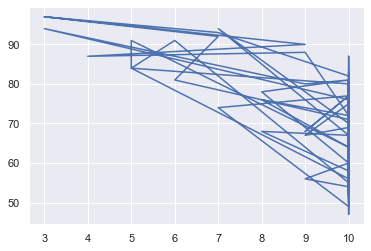

In [233]:


mask = df['Date'].map(lambda x: x.month==6 or x.month==7 or x.month==8 )     
humidity= df[mask]['Mean.Humidity']
mean_visibility= df[mask]['Mean.VisibilityMiles']
plt.plot(mean_visibility, humidity )


    
    

In [234]:
df['Mean.VisibilityMiles'].corr(df['Mean.Humidity'])

-0.5614669919230412

#### Correlation between Visibility and humidity
- As seen by the correlation there is a negative correlation but not a very strong one. As the Humdity increases there is a moderate decrease in visibility. The interesting thing is that there is almost a vertical line at x=10 that is because most days the visibility is 10miles which might be the max value also, so there are alot of clear days where visibility is 100%

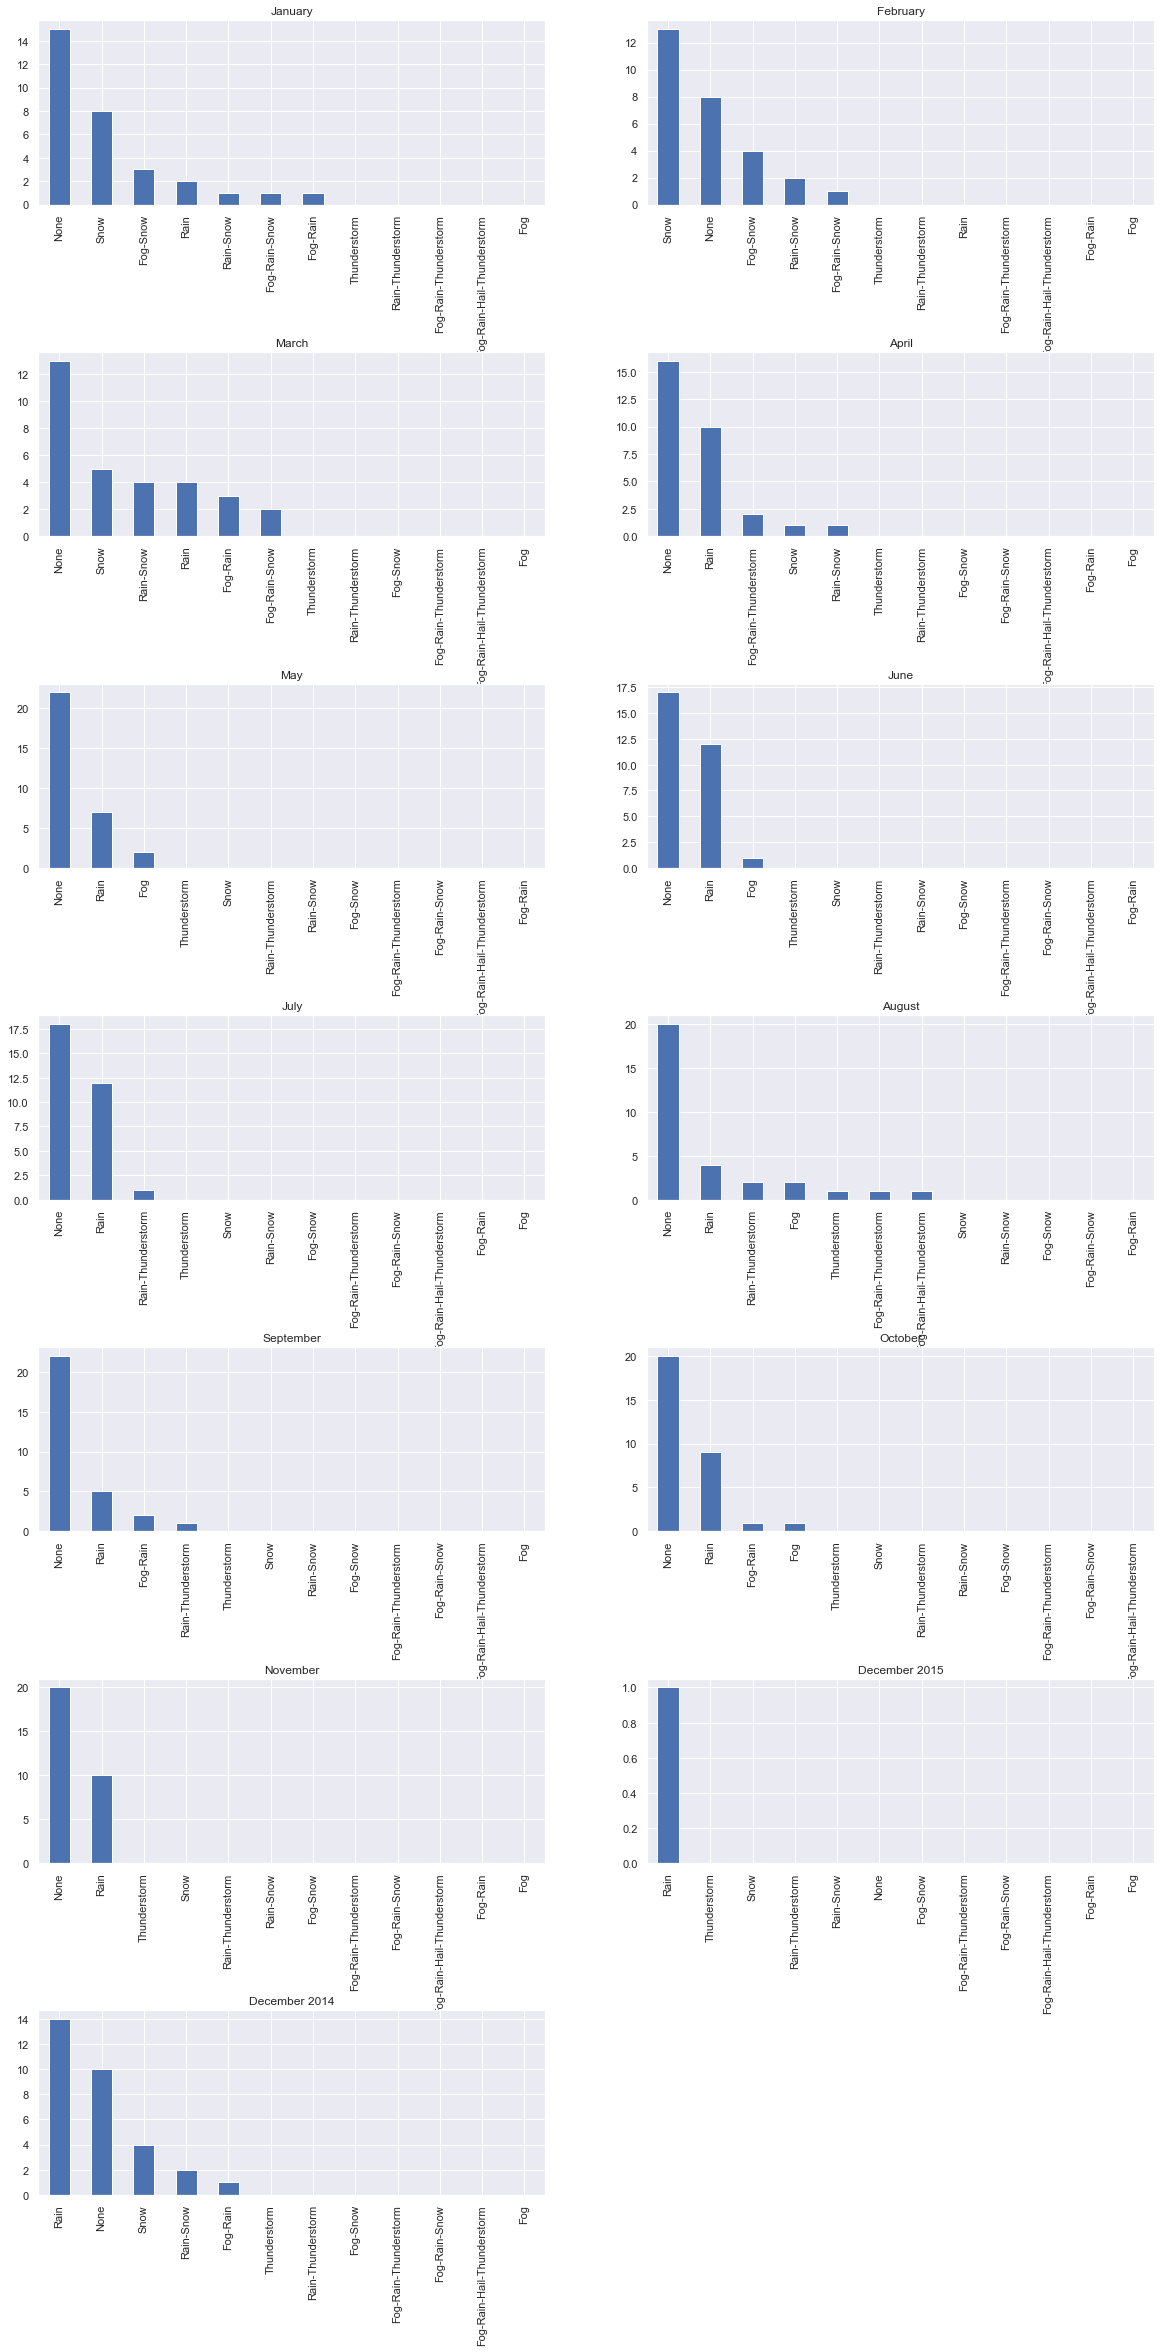

In [235]:
fig = plt.figure()
fig.set_figheight(40)
fig.set_figwidth(20)


fig.subplots_adjust( hspace=0.8)

mask = df['Date'].map(lambda x: x.month) == 1
z= df[mask]['Events'].value_counts()
ax = fig.add_subplot(7,2,1)
ax= pd.value_counts(df[mask]['Events']).plot.bar()
ax.title.set_text('January')

mask = df['Date'].map(lambda x: x.month) == 2
z= df[mask]['Events'].value_counts()
ax = fig.add_subplot(7,2,2)
ax= pd.value_counts(df[mask]['Events']).plot.bar()
ax.title.set_text('February')
    
mask = df['Date'].map(lambda x: x.month) == 3
z= df[mask]['Events'].value_counts()
ax = fig.add_subplot(7,2,3)
ax= pd.value_counts(df[mask]['Events']).plot.bar()
ax.title.set_text('March')

mask = df['Date'].map(lambda x: x.month) == 4
z= df[mask]['Events'].value_counts()
ax = fig.add_subplot(7,2,4)
ax= pd.value_counts(df[mask]['Events']).plot.bar()
ax.title.set_text('April')
    
mask = df['Date'].map(lambda x: x.month) == 5
z= df[mask]['Events'].value_counts()
ax = fig.add_subplot(7,2,5)
ax= pd.value_counts(df[mask]['Events']).plot.bar()
ax.title.set_text('May')

mask = df['Date'].map(lambda x: x.month) == 6
z= df[mask]['Events'].value_counts()
ax = fig.add_subplot(7,2,6)
ax= pd.value_counts(df[mask]['Events']).plot.bar()
ax.title.set_text('June')
    
mask = df['Date'].map(lambda x: x.month) == 7
z= df[mask]['Events'].value_counts()
ax = fig.add_subplot(7,2,7)
ax= pd.value_counts(df[mask]['Events']).plot.bar()
ax.title.set_text('July')
    
    
mask = df['Date'].map(lambda x: x.month) == 8
z= df[mask]['Events'].value_counts()
ax = fig.add_subplot(7,2,8)
ax= pd.value_counts(df[mask]['Events']).plot.bar()
ax.title.set_text('August')

mask = df['Date'].map(lambda x: x.month) == 9
z= df[mask]['Events'].value_counts()
ax = fig.add_subplot(7,2,9)
ax= pd.value_counts(df[mask]['Events']).plot.bar()
ax.title.set_text('September')
    

mask = df['Date'].map(lambda x: x.month) == 10
z= df[mask]['Events'].value_counts()
ax = fig.add_subplot(7,2,10)
ax= pd.value_counts(df[mask]['Events']).plot.bar()
ax.title.set_text('October')


mask = df['Date'].map(lambda x: x.month) == 11
z= df[mask]['Events'].value_counts()
ax = fig.add_subplot(7,2,11)
ax= pd.value_counts(df[mask]['Events']).plot.bar()
ax.title.set_text('November')




mask = df['Date'].map(lambda x: x.month==12 and x.year==2015)
z= df[mask]['Events'].value_counts()
ax = fig.add_subplot(7,2,12)
ax= pd.value_counts(df[mask]['Events']).plot.bar()
ax.title.set_text('December 2015')


mask = df['Date'].map(lambda x: x.month==12 and x.year==2014)
z= df[mask]['Events'].value_counts()
ax = fig.add_subplot(7,2,13)
ax= pd.value_counts(df[mask]['Events']).plot.bar()
ax.title.set_text('December 2014')





#### Events:
- Event which occured the most is rain and December 2014


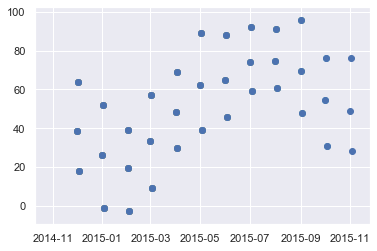

In [236]:
val=[]
min=[]
month=[]






mask = df['Date'].map(lambda x: x.year) == 2014
val.append(df[mask]['Mean.TemperatureF'].mean())
val.append(df[mask]['Max.TemperatureF'].max())
val.append(df[mask]['Min.TemperatureF'].min())    
month.append(df[mask]['Date'].head(3))
    



for i in range(1,12):
    mask = df['Date'].map(lambda x: x.month) == i
    val.append(df[mask]['Mean.TemperatureF'].mean())
    val.append(df[mask]['Max.TemperatureF'].max())
    val.append(df[mask]['Min.TemperatureF'].min())    
    month.append(df[mask]['Date'].head(3))
    plt.scatter(month,val)
    
    
    
    
    
    
    









    
  

## minimum, maximum and average temprature
- Average is middle value, and max and min are above and below to avg for every month.The trend is that during January- March the difference between the max and min temperatures are more. However, with start of hot months: May , June , July august the difference starts to shrink and is the least in July and August and then starts to increase again from September to December


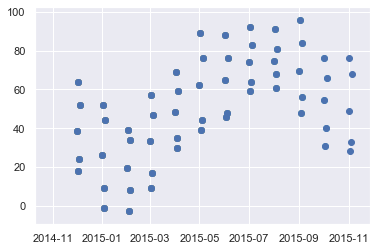

In [237]:
val=[]
min=[]
month=[]






mask = df['Date'].map(lambda x: x.year) == 2014
val.append(df[mask]['Mean.TemperatureF'].mean())
val.append(df[mask]['Max.TemperatureF'].max())
val.append(df[mask]['Min.TemperatureF'].min())
val.append(df[mask]['Mean.TemperatureF'].min())
val.append(df[mask]['Mean.TemperatureF'].max())



month.append(df[mask]['Date'].head(5))
    



for i in range(1,12):
    mask = df['Date'].map(lambda x: x.month) == i
    val.append(df[mask]['Mean.TemperatureF'].mean())
    val.append(df[mask]['Max.TemperatureF'].max())
    val.append(df[mask]['Min.TemperatureF'].min())  
    val.append(df[mask]['Mean.TemperatureF'].min())
    val.append(df[mask]['Mean.TemperatureF'].max())

    month.append(df[mask]['Date'].head(5))
    plt.scatter(month,val)
    
    
    
    
    
    
    









    
  

## Same plot as above but addition of temperature of hottest and coldest day of every month 


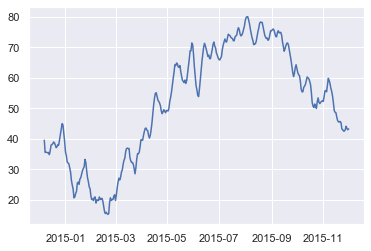

In [238]:
val=[]
month=[]



val= df['Mean.TemperatureF'].rolling(7).mean()

month= df['Date']

plt.plot(month, val)



## Rolling mean weekly

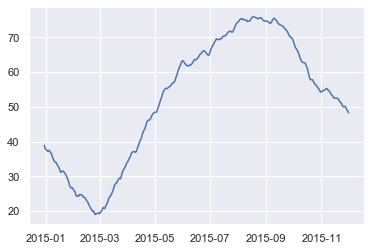

In [239]:
val=[]
month=[]



val= df['Mean.TemperatureF'].rolling(30).mean()

month= df['Date']

plt.plot(month, val)

## Rolling mean Monthly